In [2]:
import numpy as np
import pandas as pd

In [3]:
pip show gensim

Name: gensim
Version: 4.3.0
Summary: Python framework for fast Vector Space Modelling
Home-page: http://radimrehurek.com/gensim
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPL-2.1-only
Location: C:\Users\HP\anaconda3\Lib\site-packages
Requires: FuzzyTM, numpy, scipy, smart-open
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [4]:
import gensim
import os

In [5]:
file = open('bbc\\tech\\001.txt')

In [6]:
text = file.read()

In [7]:
l1 = [i for i in text.split('\n')]

In [8]:
l1

['Ink helps drive democracy in Asia',
 '',
 "The Kyrgyz Republic, a small, mountainous state of the former Soviet republic, is using invisible ink and ultraviolet readers in the country's elections as part of a drive to prevent multiple voting.",
 '',
 'This new technology is causing both worries and guarded optimism among different sectors of the population. In an effort to live up to its reputation in the 1990s as "an island of democracy", the Kyrgyz President, Askar Akaev, pushed through the law requiring the use of ink during the upcoming Parliamentary and Presidential elections. The US government agreed to fund all expenses associated with this decision.',
 '',
 'The Kyrgyz Republic is seen by many experts as backsliding from the high point it reached in the mid-1990s with a hastily pushed through referendum in 2003, reducing the legislative branch to one chamber with 75 deputies. The use of ink is only one part of a general effort to show commitment towards more open elections - 

In [9]:
text

'Ink helps drive democracy in Asia\n\nThe Kyrgyz Republic, a small, mountainous state of the former Soviet republic, is using invisible ink and ultraviolet readers in the country\'s elections as part of a drive to prevent multiple voting.\n\nThis new technology is causing both worries and guarded optimism among different sectors of the population. In an effort to live up to its reputation in the 1990s as "an island of democracy", the Kyrgyz President, Askar Akaev, pushed through the law requiring the use of ink during the upcoming Parliamentary and Presidential elections. The US government agreed to fund all expenses associated with this decision.\n\nThe Kyrgyz Republic is seen by many experts as backsliding from the high point it reached in the mid-1990s with a hastily pushed through referendum in 2003, reducing the legislative branch to one chamber with 75 deputies. The use of ink is only one part of a general effort to show commitment towards more open elections - the German Embassy

In [10]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [11]:
from nltk.corpus import stopwords
import re

stop_words = set(stopwords.words('english'))
pattern = r'\b(' + '|'.join(re.escape(word) for word in stop_words) + r')\b'

In [12]:
news = []

In [13]:
for i in os.listdir('bbc\\tech'):
    file = open(os.path.join('bbc\\tech',i))
    text = file.read()
    text_1 = re.sub('\n',' ',text)
    processed_text = (re.sub(pattern, '', text_1, flags=re.IGNORECASE)).lower()
    raw_data = sent_tokenize(processed_text)
    for data in raw_data:
        news.append(simple_preprocess(data))

In [14]:
news

[['ink',
  'helps',
  'drive',
  'democracy',
  'asia',
  'kyrgyz',
  'republic',
  'small',
  'mountainous',
  'state',
  'former',
  'soviet',
  'republic',
  'using',
  'invisible',
  'ink',
  'ultraviolet',
  'readers',
  'country',
  'elections',
  'part',
  'drive',
  'prevent',
  'multiple',
  'voting'],
 ['new',
  'technology',
  'causing',
  'worries',
  'guarded',
  'optimism',
  'among',
  'different',
  'sectors',
  'population'],
 ['effort',
  'live',
  'reputation',
  'island',
  'democracy',
  'kyrgyz',
  'president',
  'askar',
  'akaev',
  'pushed',
  'law',
  'requiring',
  'use',
  'ink',
  'upcoming',
  'parliamentary',
  'presidential',
  'elections'],
 ['us', 'government', 'agreed', 'fund', 'expenses', 'associated', 'decision'],
 ['kyrgyz',
  'republic',
  'seen',
  'many',
  'experts',
  'backsliding',
  'high',
  'point',
  'reached',
  'mid',
  'hastily',
  'pushed',
  'referendum',
  'reducing',
  'legislative',
  'branch',
  'one',
  'chamber',
  'deputies'],

## building model

In [15]:
model = gensim.models.Word2Vec(
    window = 10,
    min_count = 4,
    vector_size=100
)

In [16]:
model.build_vocab(news)

In [21]:
print(model.wv.key_to_index)

{'said': 0, 'people': 1, 'one': 2, 'also': 3, 'new': 4, 'mr': 5, 'technology': 6, 'mobile': 7, 'would': 8, 'could': 9, 'users': 10, 'games': 11, 'us': 12, 'music': 13, 'use': 14, 'software': 15, 'digital': 16, 'net': 17, 'year': 18, 'many': 19, 'like': 20, 'make': 21, 'game': 22, 'phone': 23, 'computer': 24, 'online': 25, 'get': 26, 'time': 27, 'uk': 28, 'world': 29, 'video': 30, 'tv': 31, 'used': 32, 'service': 33, 'way': 34, 'microsoft': 35, 'first': 36, 'internet': 37, 'million': 38, 'high': 39, 'broadband': 40, 'data': 41, 'using': 42, 'information': 43, 'services': 44, 'system': 45, 'phones': 46, 'market': 47, 'says': 48, 'security': 49, 'two': 50, 'number': 51, 'players': 52, 'content': 53, 'much': 54, 'apple': 55, 'firm': 56, 'search': 57, 'work': 58, 'firms': 59, 'media': 60, 'web': 61, 'according': 62, 'based': 63, 'take': 64, 'well': 65, 'last': 66, 'news': 67, 'around': 68, 'pc': 69, 'next': 70, 'research': 71, 'companies': 72, 'mail': 73, 'networks': 74, 'site': 75, 'compan

In [23]:
len(model.wv)

4494

In [24]:
model.train(news,total_examples=model.corpus_count, epochs=model.epochs)

(495391, 571670)

In [25]:
model.wv.most_similar(['asia'])

[('ever', 0.9992743730545044),
 ('even', 0.9992493987083435),
 ('ink', 0.9992098212242126),
 ('public', 0.9992018938064575),
 ('thousands', 0.99919593334198),
 ('international', 0.999161422252655),
 ('early', 0.9991579055786133),
 ('see', 0.9991559386253357),
 ('interest', 0.9991530179977417),
 ('part', 0.9991528987884521)]

In [26]:
model.wv.doesnt_match(['mountainous',
  'state',
  'former',
  'soviet',
  'republic','progress'])

'progress'

In [27]:
model.wv['republic']

array([-0.11967533,  0.21319361,  0.11594156, -0.10560112,  0.07855159,
       -0.36692142,  0.08232172,  0.43772048, -0.17770563, -0.14284258,
        0.01095103, -0.34092513, -0.0953481 ,  0.06782534,  0.02861343,
       -0.1412164 ,  0.00192282, -0.19141866,  0.00461127, -0.37826478,
        0.11674   ,  0.09028374,  0.12849812, -0.15448177, -0.09003307,
        0.02171569, -0.13212948, -0.16346592, -0.17221013, -0.00780007,
        0.15083326,  0.10510179,  0.16510206, -0.13498741, -0.11641654,
        0.15624042, -0.02155539, -0.23352602, -0.10493   , -0.36796036,
       -0.00311473, -0.17169721, -0.03532822, -0.01842169,  0.13244173,
       -0.08501987, -0.23404118,  0.0609165 ,  0.06532107,  0.13708256,
        0.0488259 , -0.22504687, -0.06754281, -0.00634663, -0.06074004,
        0.06452065,  0.18555038,  0.04482576, -0.22280514,  0.03426244,
        0.01941708,  0.08749352, -0.18626186,  0.00064087, -0.17010713,
        0.17857343,  0.05330696,  0.19281082, -0.28343114,  0.17

In [22]:
model.wv.similarity('asia','iceberg')

-0.055658184

In [39]:
model.wv.similarity('online','internet')

0.9991745

In [51]:
model.wv['open'].shape

(100,)

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components=3)

In [42]:
X = pca.fit_transform(model.wv.get_normed_vectors())

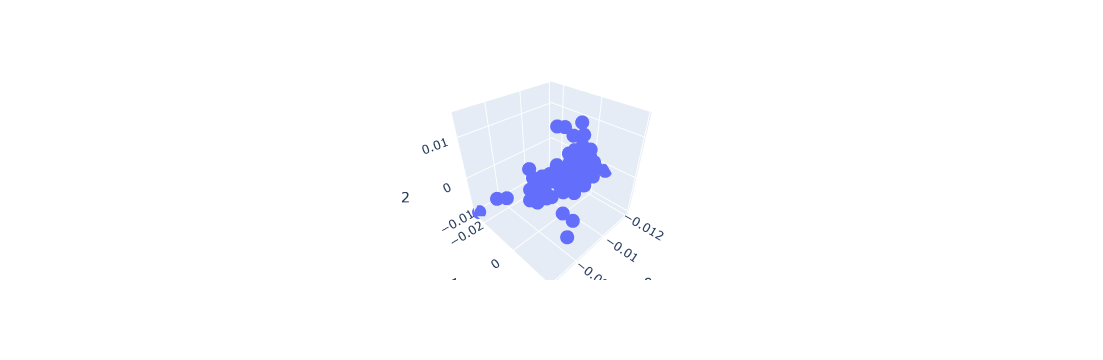

In [50]:
import plotly.express as px
fig = px.scatter_3d(X[200:300],x=0,y=1,z=2)
fig.show()